# Study issue where events have two rechits at the same location

See duplicateRechits document for explanation

In [1]:
import itertools
import uproot
import pandas as pd
import awkward as ak
import os
os.environ["X509_USER_PROXY"]="~/.t3/proxy.cert"
import matplotlib.pyplot as plt

In [2]:
tree = uproot.open("root://eoscms.cern.ch///eos/cms/store/group/dpg_hgcal/tb_hgcal/2018/cern_h2_october/offline_analysis/ntuples/v16/ntuple_675.root:rechitntupler/hits")

In [3]:
arrays = tree.arrays(filter_name=["event", "trigger_timestamp", "beamEnergy", "NRechits",'rechit_detid',
 'rechit_module',
 'rechit_layer',
 'rechit_chip',
 'rechit_channel',
 'rechit_type',
 'rechit_x',
 'rechit_y',
 'rechit_z',
 'rechit_iu',
 'rechit_iv',
 'rechit_iU',
 'rechit_iV',
 'rechit_energy',
 'rechit_energy_noHG',
 'rechit_amplitudeHigh',
 'rechit_amplitudeLow',
 'rechit_hg_goodFit',
 'rechit_lg_goodFit',
 'rechit_hg_saturated',
 'rechit_lg_saturated',
 'rechit_fully_calibrated',
 'rechit_noise_flag',
 'rechit_TS2High',
 'rechit_TS2Low',
 'rechit_TS3High',
 'rechit_TS3Low',
 'rechit_Tot',
 'rechit_toaRise',
 'rechit_toaFall'])
arrays

<Array [{event: 1, ...}, {...}, ..., {...}] type='10421 * {event: uint32, t...'>

In [4]:
df = ak.to_dataframe(arrays).reset_index().set_index(["event", "subentry"])

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.min_rows', 100)
pd.options.display.max_columns = 50

In [6]:
df

entry  trigger_timestamp  pdgID  beamEnergy  NRechits   
event subentry                                                          
1     0             0     47704017715000     11       200.0       959  \
      1             0     47704017715000     11       200.0       959   
      2             0     47704017715000     11       200.0       959   
      3             0     47704017715000     11       200.0       959   
      4             0     47704017715000     11       200.0       959   
      5             0     47704017715000     11       200.0       959   
      6             0     47704017715000     11       200.0       959   
      7             0     47704017715000     11       200.0       959   
      8             0     47704017715000     11       200.0       959   
      9             0     47704017715000     11       200.0       959   
      10            0     47704017715000     11       200.0       959   
      11            0     47704017715000     11       200.0       959   
      12            0     47704017715000     11       200.0       959   
      13            0     47704017715000     11       200.0       959   
      14            0     47704017715000     11       200.0       959   
      15            0     47704017715000     11       200.0       959   
      16            0     47704017715000     11       200.0       959   
      17            0     47704017715000     11       200.0       959   
      18            0     47704017715000     11       200.0       959   
      19            0     47704017715000     11       200.0       959   
      20            0     47704017715000     11       200.0       959   
      21            0     47704017715000     11       200.0       959   
      22            0     47704017715000     11       200.0       959   
      23            0     47704017715000     11       200.0       959   
      24            0     47704017715000     11       200.0       959   
      25            0     47704017715000     11       200.0       959   
      26            0     47704017715000     11       200.0       959   
      27            0     47704017715000     11       200.0       959   
      28            0     47704017715000     11       200.0       959   
      29            0     47704017715000     11       200.0       959   
      30            0     47704017715000     11       200.0       959   
      31            0     47704017715000     11       200.0       959   
      32            0     47704017715000     11       200.0       959   
      33            0     47704017715000     11       200.0       959   
      34            0     47704017715000     11       200.0       959   
      35            0     47704017715000     11       200.0       959   
      36            0     47704017715000     11       200.0       959   
      37            0     47704017715000     11       200.0       959   
      38            0     47704017715000     11       200.0       959   
      39            0     47704017715000     11       200.0       959   
      40            0     47704017715000     11       200.0       959   
      41            0     47704017715000     11       200.0       959   
      42            0     47704017715000     11       200.0       959   
      43            0     47704017715000     11       200.0       959   
      44            0     47704017715000     11       200.0       959   
      45            0     47704017715000     11       200.0       959   
      46            0     47704017715000     11       200.0       959   
      47            0     47704017715000     11       200.0       959   
      48            0     47704017715000     11       200.0       959   
      49            0     47704017715000     11       200.0       959   
...               ...                ...    ...         ...       ...   
10421 937       10420       979252543745     11       200.0       987   
      938       10420       979252543745     11       200.0       987   
 

### Rechits type
0 - full cell, 1 - calibration pad, 2 - half cell,3 - mouse bite, 4 - outer calib. pad, 5 - merged cell

In [31]:
df.rechit_type.value_counts()

rechit_type
0    8987112
2     328642
4     211133
3      93071
1      50271
Name: count, dtype: int64

## Finding duplicate rechits positions

In [8]:
counts = df.groupby(level="event").value_counts(["rechit_x", "rechit_y", "rechit_z"])
counts_sel = counts[counts > 1]
counts_sel.max()

event  rechit_x    rechit_y    rechit_z  
1      -1.948975    3.375488   37.117500     2
       -15.591797  -2.250488   129.968994    1
       -1.948975   -2.250488   39.922501     1
                               29.592501     1
                               31.507500     1
                               32.397499     1
                               34.312500     1
                               35.202499     1
                               37.117500     1
                               38.007500     1
                               40.812500     1
                               25.697500     1
                               44.037498     1
                               49.681999     1
                   -1.125244   22.692499     1
                               23.582500     1
                               25.697500     1
                               26.587500     1
                               28.702499     1
                   -2.250488   28.702499     1
                  

In [10]:
counts_sel

event  rechit_x   rechit_y  rechit_z 
1      -1.948975  3.375488  37.117500    2
2      -1.948975  3.375488  28.702499    2
                            31.507500    2
                            37.117500    2
4      -1.948975  3.375488  37.117500    2
                            19.687500    2
                            22.692499    2
                            25.697500    2
                            28.702499    2
                            31.507500    2
                            34.312500    2
5      -1.948975  3.375488  31.507500    2
                            19.687500    2
                            28.702499    2
7      -1.948975  3.375488  34.312500    2
                            16.782499    2
                            22.692499    2
                            39.922501    2
8      -1.948975  3.375488  19.687500    2
                            25.697500    2
                            28.702499    2
                            31.507500    2
                

<Axes: >

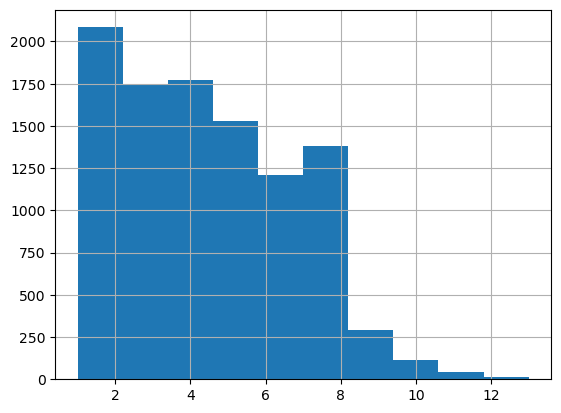

In [11]:
counts_sel.groupby("event").count().hist()

In [12]:
# Fraction of events that have overlapping rechits
len(counts_sel.index.remove_unused_levels().levels[0])/len(counts_sel.index.levels[0])

0.9774493810574801

### Skipping outer calibration pads

In [13]:
reset_df = df.reset_index()
reset_df = reset_df[reset_df.rechit_type != 4]
df_of_duplicates = reset_df[reset_df.duplicated(["event", "rechit_x", "rechit_y", "rechit_z"], keep=False)].set_index(["event", "subentry"])

In [14]:
df_of_duplicates

entry  trigger_timestamp  pdgID  beamEnergy  NRechits   
event subentry                                                          
160   945         159     47704017714945     11       200.0       978  \
      946         159     47704017714945     11       200.0       978   
223   1016        222             626689     11       200.0      1052   
      1017        222             626689     11       200.0      1052   
280   963         279                  1     11       200.0       973   
      966         279                  1     11       200.0       973   
367   943         366             626689     11       200.0      1001   
      944         366             626689     11       200.0      1001   
421   963         420                  1     11       200.0      1020   
      964         420                  1     11       200.0      1020   
431   922         430                  1     11       200.0       979   
      923         430                  1     11       200.0       979   
442   977         441             626689     11       200.0      1035   
      978         441             626689     11       200.0      1035   
481   998         480                  1     11       200.0      1041   
      999         480                  1     11       200.0      1041   
721   1063        720       979252543745     11       200.0      1225   
      1064        720       979252543745     11       200.0      1225   
1083  475        1082       979252543745     11       200.0       538   
      476        1082       979252543745     11       200.0       538   
1666  929        1665                  1     11       200.0       983   
      930        1665                  1     11       200.0       983   
1761  883        1760       979252543745     11       200.0       926   
      884        1760       979252543745     11       200.0       926   
2126  962        2125                  1     11       200.0      1012   
      963        2125                  1     11       200.0      1012   
2272  946        2271                  1     11       200.0       996   
      948        2271                  1     11       200.0       996   
2377  986        2376       979252543745     11       200.0      1028   
      987        2376       979252543745     11       200.0      1028   
2390  1196       2389                  1     11       200.0      1211   
      1201       2389                  1     11       200.0      1211   
      1202       2389                  1     11       200.0      1211   
      1205       2389                  1     11       200.0      1211   
2441  987        2440       979252543745     11       200.0      1037   
      988        2440       979252543745     11       200.0      1037   
2512  1085       2511      2607045149185     11       200.0      1097   
      1090       2511      2607045149185     11       200.0      1097   
      1091       2511      2607045149185     11       200.0      1097   
      1094       2511      2607045149185     11       200.0      1097   
2829  1058       2828       979252543745     11       200.0      1096   
      1059       2828       979252543745     11       200.0      1096   
3038  976        3037      2607045149185     11       200.0      1010   
      977        3037      2607045149185     11       200.0      1010   
3154  1218       3153      2607045149185     11       200.0      1234   
      1223       3153      2607045149185     11       200.0      1234   
      1224       3153      2607045149185     11       200.0      1234   
      1228       3153      2607045149185     11       200.0      1234   
3214  961        3213      2607045149185     11       200.0      1000   
      962        3213      2607045149185     11       200.0      1000   
3220  813        3219      2607045149185     11       200.0       940   
      814        3219      2607045149185     11       200.0       940   
3223  827        3222       979252543745     11       200.0      1082   
 

In [15]:
df_of_duplicates.value_counts("rechit_type")

rechit_type
2    107
3     42
0      5
Name: count, dtype: int64

In [16]:
df.value_counts("rechit_type")

rechit_type
0    9605028
2     350538
4     215742
3     107882
1      50452
Name: count, dtype: int64

In [17]:
df_of_duplicates.value_counts("rechit_chip")

rechit_chip
1    48
3    43
2    36
0    27
Name: count, dtype: int64

In [18]:
df_of_duplicates.value_counts("rechit_channel")

rechit_channel
10    29
12    19
26    18
60    14
48    12
22    11
34    11
62    11
46    10
16     6
52     5
54     5
50     2
56     1
Name: count, dtype: int64

In [19]:
df_of_duplicates.value_counts("rechit_layer").sort_index()

rechit_layer
29    72
30    28
31    14
32     4
33     2
34     4
36     4
37    26
Name: count, dtype: int64

## Visualization of positions

In [20]:
df_of_duplicates[["rechit_x", "rechit_y", "rechit_z"]].value_counts()#.drop_duplicates().sort_values(by="rechit_z")

rechit_x   rechit_y    rechit_z  
-5.846680   2.250488   64.618500     20
           -2.250488   64.618500     18
-6.821289  -0.562622   64.618500     12
-4.872070   3.937988   64.618500     10
-2.923340  -6.188477   129.968994    10
-5.846680   2.250488   71.325996      8
 0.974487  -6.188477   129.968994     8
 2.923340  -6.188477   129.968994     8
-5.846680  -2.250488   71.325996      4
-0.974487  -6.188477   78.033501      4
-4.872070  -3.937988   78.033501      4
 3.897949   5.625977   98.236000      2
                       84.841003      2
 4.872070  -3.937988   64.618500      2
 0.974487   6.188477   71.325996      2
 5.846680   2.250488   64.618500      2
 0.974487  -6.188477   78.033501      2
                       64.618500      2
-0.974487   6.188477   71.325996      2
                       64.618500      2
           -6.188477   122.560997     2
-4.872070   3.937988   122.560997     2
-2.923340  -6.188477   78.033501      2
                       71.325996      2
-6.821

In [32]:
all_rechits = df[["rechit_x", "rechit_y", "rechit_layer", "rechit_type"]].drop_duplicates().sort_values("rechit_layer")
#all_rechits = df_of_duplicates[["rechit_x", "rechit_y", "rechit_layer", "rechit_type"]]

In [34]:
all_rechits[all_rechits.rechit_layer <= 28]

,,rechit_x,rechit_y,rechit_layer,rechit_type
event,subentry,,,,
1,0,-1.948975,1.125244,1,0
67,3,-3.897949,-4.500977,1,0
363,6,2.923340,6.188477,1,3
64,5,-4.872070,-1.687744,1,0
62,10,0.974487,-0.562622,1,0
371,9,3.897949,-3.375488,1,0
57,1,-1.948975,-3.375488,1,0
1085,6,4.872070,3.937988,1,2
382,5,-0.974487,-6.188477,1,2


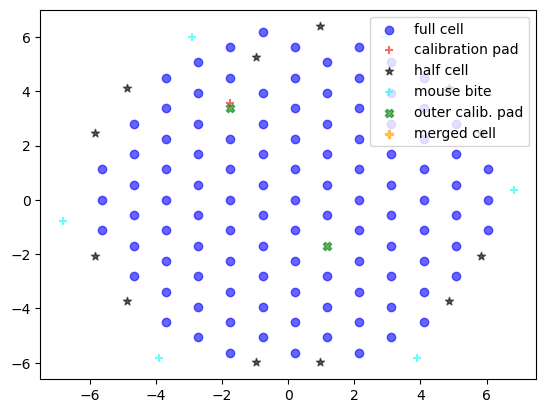

In [40]:
all_rechits_layer = all_rechits[all_rechits.rechit_layer == 17]
offs = 0.2
scatterOpts = { 0 : dict(marker='o', color='blue', label="full cell"),
    1 : dict(marker='+', color='red', label="calibration pad"),
    2 : dict(marker='*', color='black', label="half cell"),
    3: dict(marker='+', color='cyan', label="mouse bite"),
    4:dict(marker='X', color='green', label="outer calib. pad"),
    5: dict(marker='P', color='orange', label="merged cell")
}
offsets = itertools.cycle([(offs, 0), (offs, offs), (0, offs), (0, -offs)])
for rechit_type in range(6):
    all_rechits_layer_type = all_rechits_layer[all_rechits_layer.rechit_type == rechit_type]
    offset = next(offsets)
    plt.scatter(all_rechits_layer_type.rechit_x + offset[0], all_rechits_layer_type.rechit_y + offset[1],
        alpha=0.6, **scatterOpts[rechit_type])
#plt.gca().add_patch(plt.Circle((-1.948975,3.375488), radius=0.5, fill=None, color="red"))
plt.legend()